# Comparison of Standard IF to Cyclic IF

**Question:** How does the signal-to-background ratio and staining specificity compare in standard IF vs. cyclic IF?

**Samples:** 
- Tissue ID 44290: HER2+/ER+ breast cancer. Section 112 stained with a 5 round cyclic IF protocol, sections 113 to 116 stained with the same antibodies in a standard IF protocol.
- Tissue ID 44294: Adjacent normal breast from the patient above. Section 116 is cyclic, section 117 to 120 are standard IF.

**Method**: For each stain, pixel intensity was manually thresholded to separate the positive pixels from the negative. Visualizations produced include:
1. Autoscaled overview of stain, with dynamic range of 0 - 99th percentile displayed in legend.
2. Mask of positive pixels, so that masks from standard and corresponding cyclic stains can be compared for specificity.
3. Measure mean intensity in mask area and background, and output values to .csv for downstream analysis.

In [1]:
#libraries 
import os
import pandas as pd
import numpy as np
from mplex_image import preprocess, process, analyze, mpimage, cmif
import shutil
#import importlib
import skimage
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
#paths
codedir = '/home/groups/graylab_share/OMERO.rdsStore/engje/Data/cycIF_ValidationStudies/cycIF_Validation'

In [3]:
%matplotlib inline

CD20  2
mean positive intensity = 9722.508642908691
mean negative intensity = 2007.485063265942
mean positive intensity = 3178.316125891591
mean negative intensity = 1551.6972463832733
CD4  2
mean positive intensity = 5846.130268742984
mean negative intensity = 826.7743632470039
mean positive intensity = 3870.925120284348
mean negative intensity = 882.7051937186922
CD44  4
mean positive intensity = 1077.8253391808576
mean negative intensity = 228.44067384168252
mean positive intensity = 2056.920745881985
mean negative intensity = 411.10493849181233
mean positive intensity = 3375.9487828721994
mean negative intensity = 649.8392201319142
mean positive intensity = 2800.88415837313
mean negative intensity = 697.5208400932814
CD45  4
mean positive intensity = 2151.7346514409164
mean negative intensity = 646.3186567261027
mean positive intensity = 2507.558644671703
mean negative intensity = 920.4494127360417
mean positive intensity = 2718.9142283267765
mean negative intensity = 759.846212532

/home/exacloud/tempwork/Chin_Lab/bin/miniconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/exacloud/tempwork/Chin_Lab/bin/miniconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


mean positive intensity = nan
mean negative intensity = 615.6241465811966
mean positive intensity = 8329.370369325794
mean negative intensity = 498.0582194980494
mean positive intensity = nan
mean negative intensity = 778.2589102564102
CK19  2
mean positive intensity = 6591.164773276612
mean negative intensity = 305.4449934221288
mean positive intensity = 5865.8220717986505
mean negative intensity = 1371.5598070323522
CK5  4
mean positive intensity = 2212.478027114318
mean negative intensity = 262.66906053803166
mean positive intensity = 2737.710361067504
mean negative intensity = 1064.6469503682563
mean positive intensity = 3012.91117311043
mean negative intensity = 437.3413059068269
mean positive intensity = 1081.982456140351
mean negative intensity = 465.06505201195074
CK7  4
mean positive intensity = 2075.1763987762547
mean negative intensity = 176.64888101588386
mean positive intensity = 2984.690185752184
mean negative intensity = 299.2521660699155
mean positive intensity = 3031.1

/home/exacloud/tempwork/Chin_Lab/bin/miniconda3/lib/python3.7/site-packages/mplex_image/mpimage.py:330: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(tu_array[0],tu_array[1],figsize=tu_fig)


mean positive intensity = 2928.779373100375
mean negative intensity = 463.4707859846207
mean positive intensity = 1154.717168537754
mean negative intensity = 604.0686387982543
mean positive intensity = 3713.730016849546
mean negative intensity = 772.6465633123203
mean positive intensity = 1621.9711043566363
mean negative intensity = 806.2331710775811


/home/exacloud/tempwork/Chin_Lab/bin/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Ecad  4
mean positive intensity = 1751.2595939522519
mean negative intensity = 630.9209798157767
mean positive intensity = 1405.0147167534774
mean negative intensity = 712.479540979185
mean positive intensity = 1495.9401045075708
mean negative intensity = 517.5430376600394
mean positive intensity = 707.4614705960985
mean negative intensity = 529.0341693391704
Her2  4
mean positive intensity = nan
mean negative intensity = 671.0752316239316
mean positive intensity = 2633.5333766208046
mean negative intensity = 802.4005291455812
mean positive intensity = nan
mean negative intensity = 2002.2639183760684
mean positive intensity = 3269.396128147344
mean negative intensity = 1081.05600205966
Ki67  4
mean positive intensity = 3571.5182119205297
mean negative intensity = 197.9636472825027
mean positive intensity = 1791.9548182619517
mean negative intensity = 235.28158833367272
mean positive intensity = 3589.478712482638
mean negative intensity = 218.21863914519187
mean positive intensity = 126

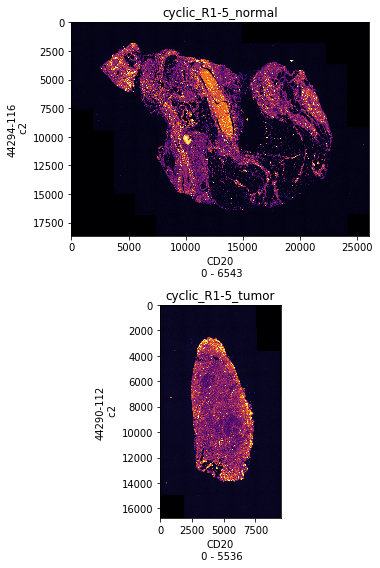

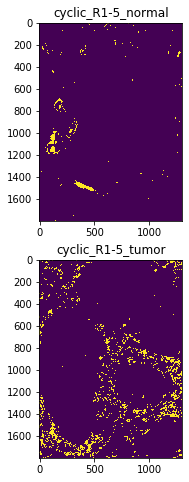

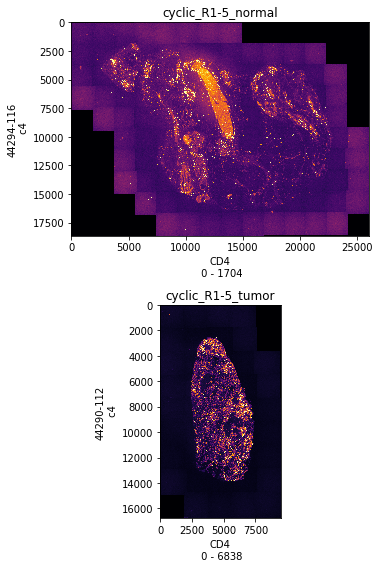

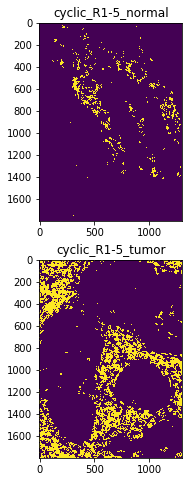

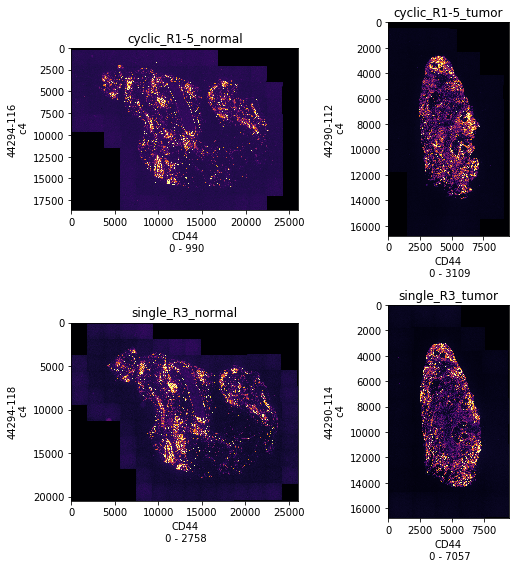

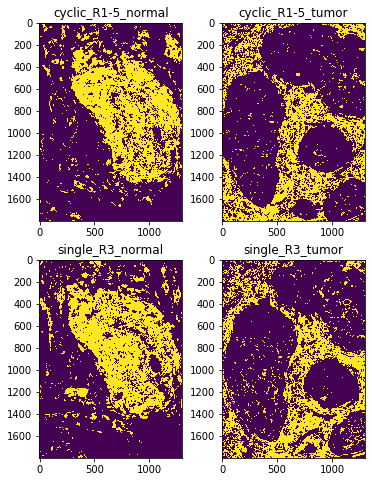

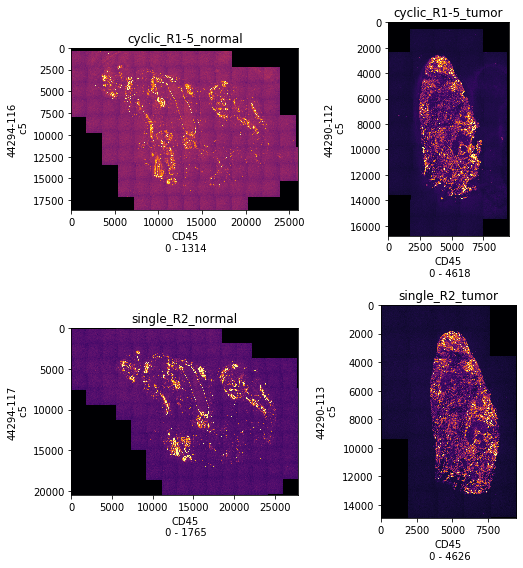

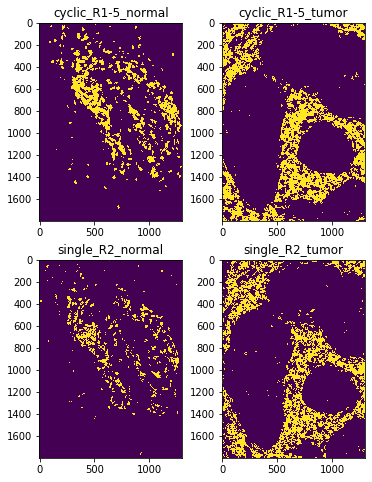

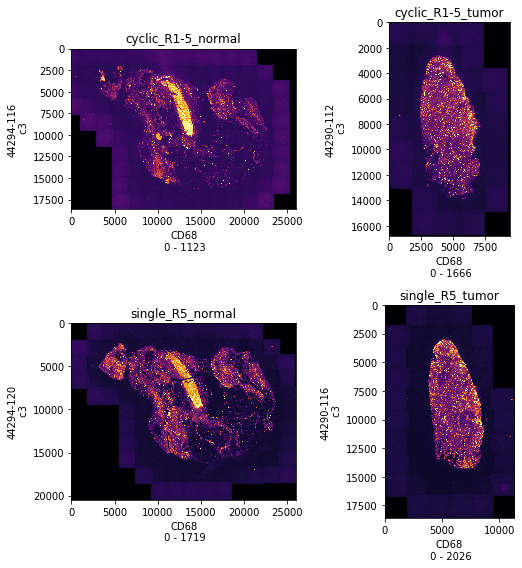

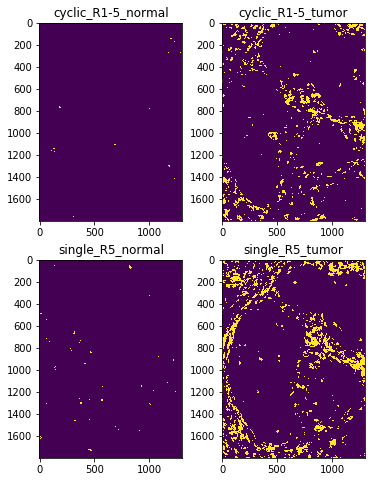

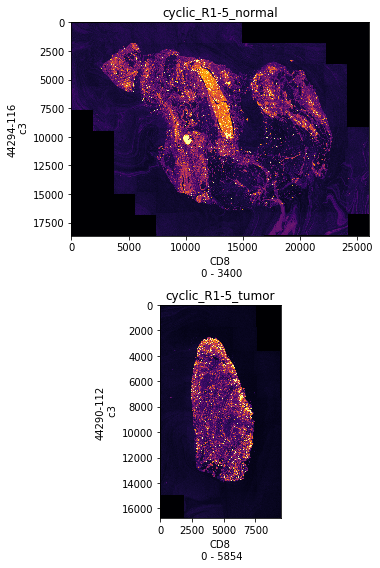

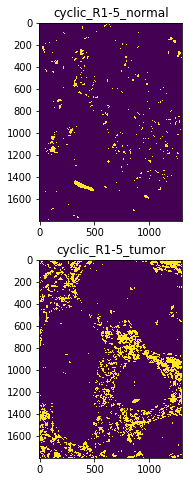

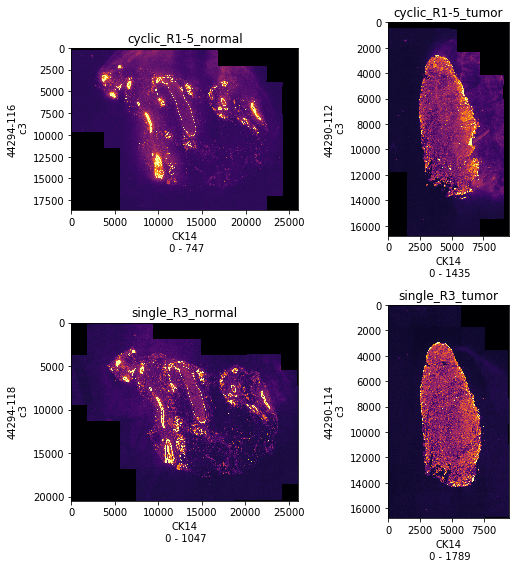

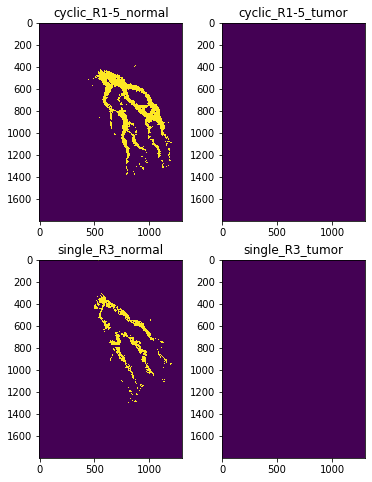

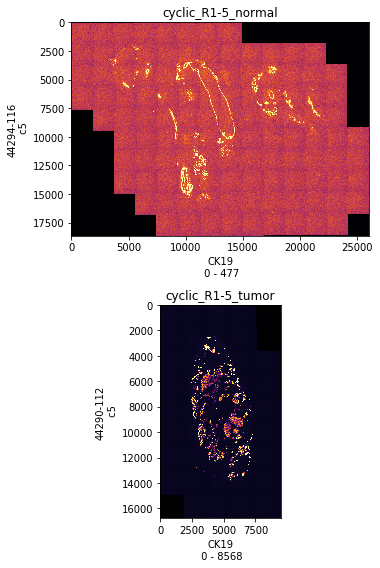

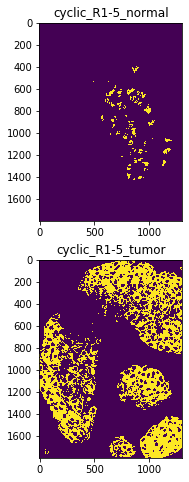

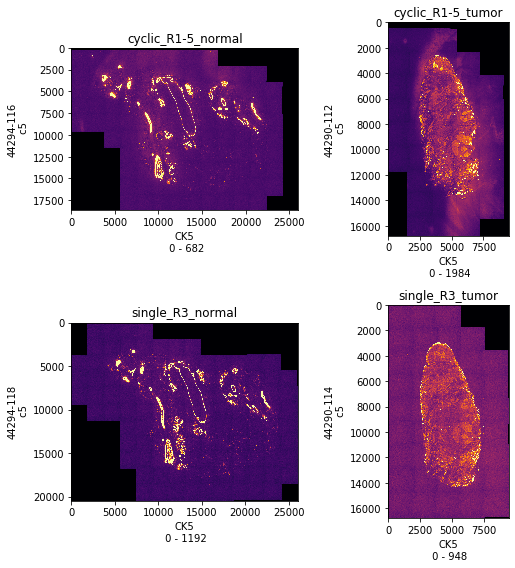

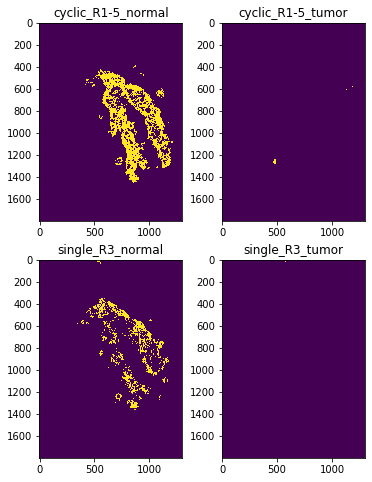

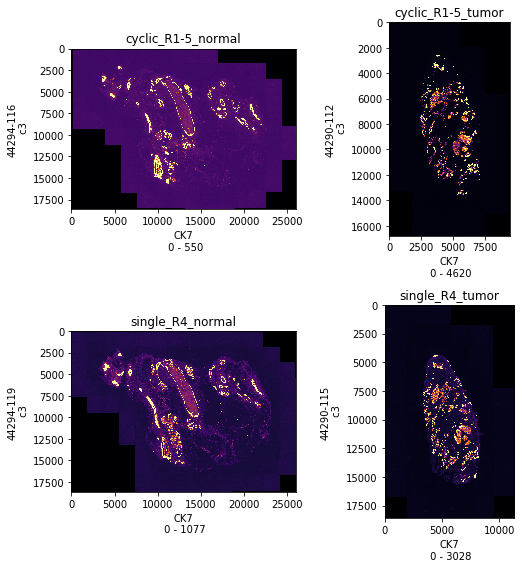

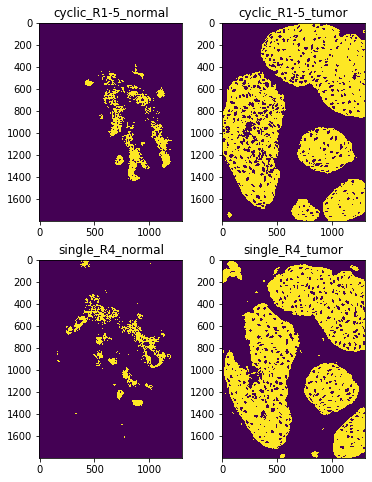

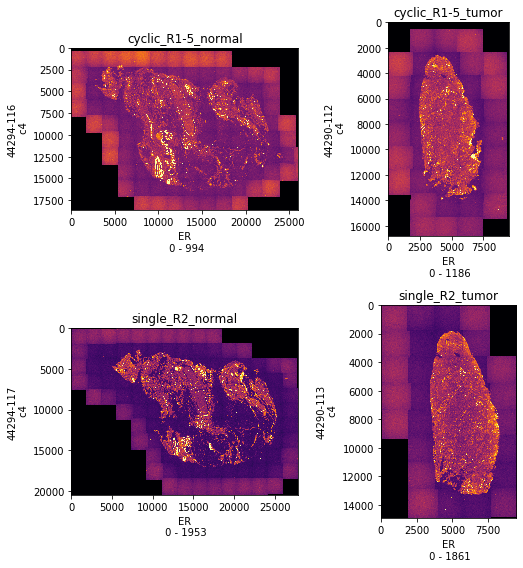

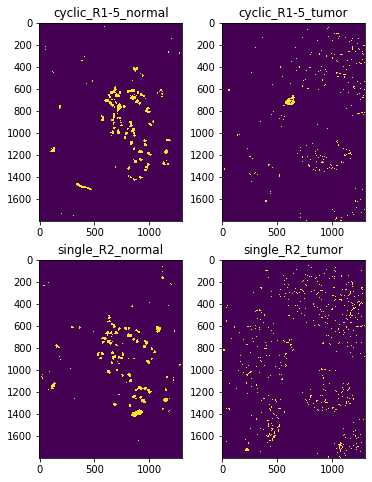

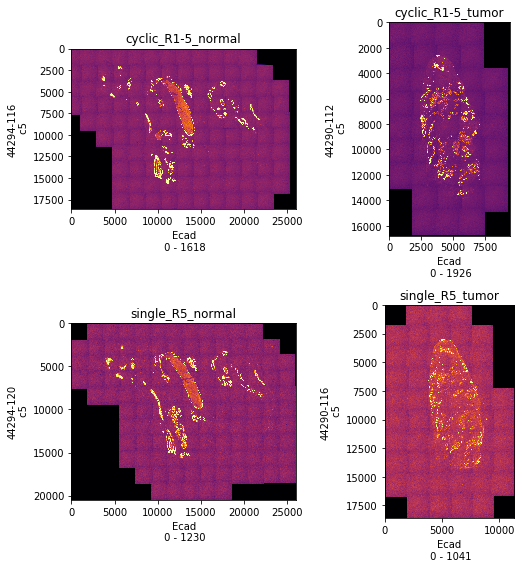

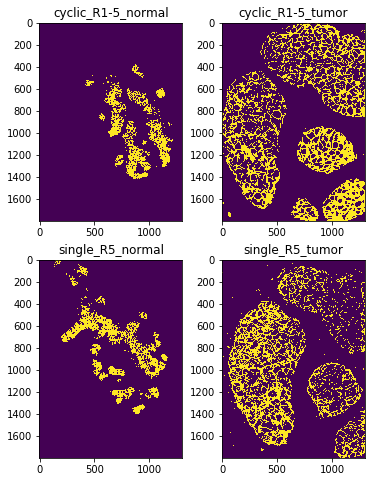

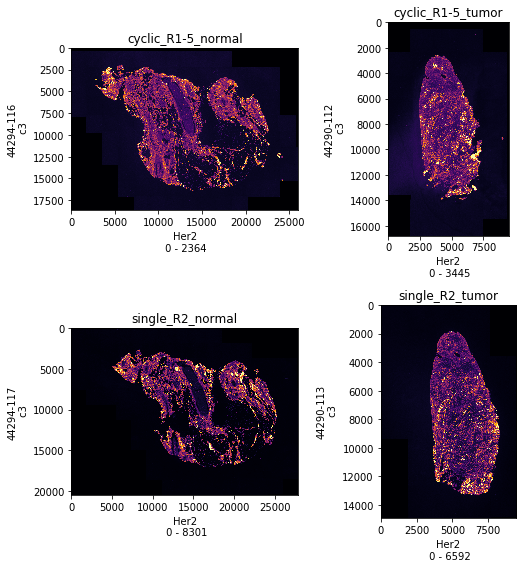

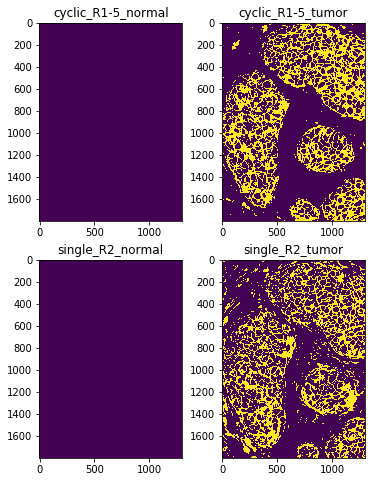

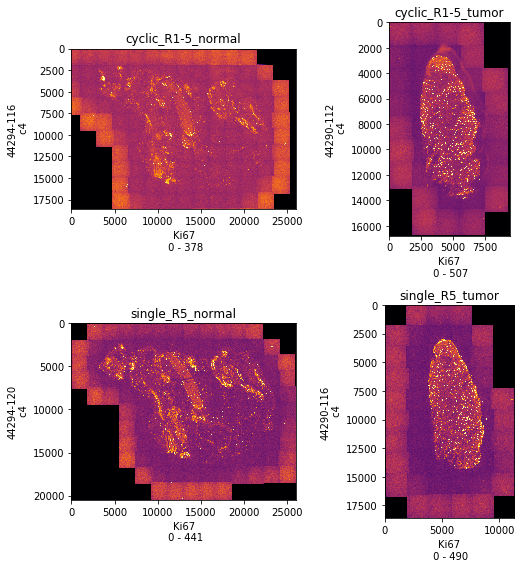

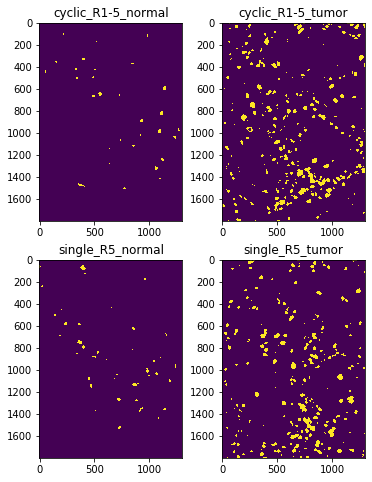

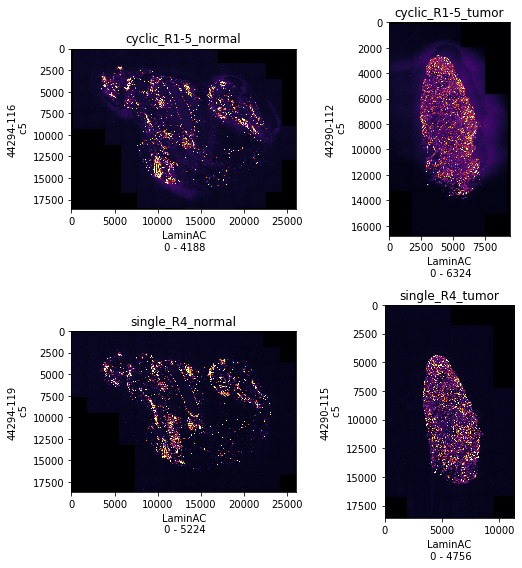

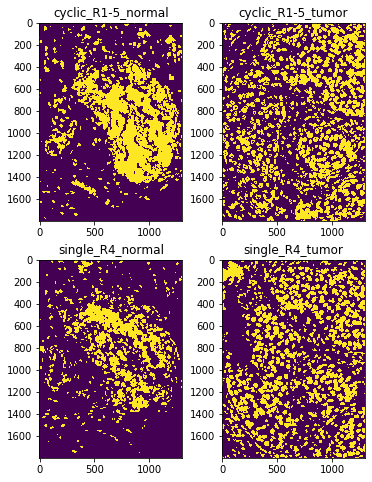

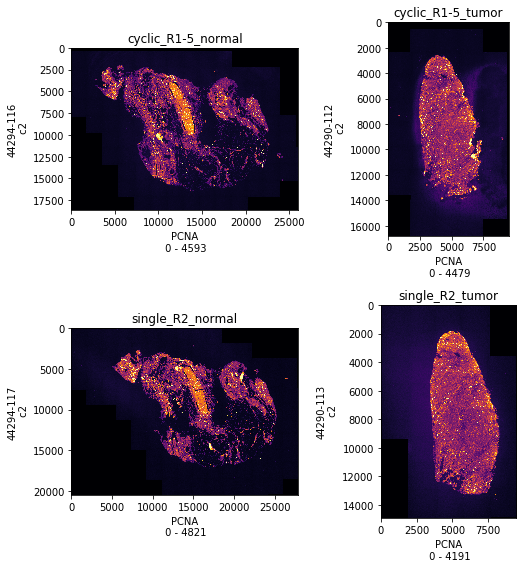

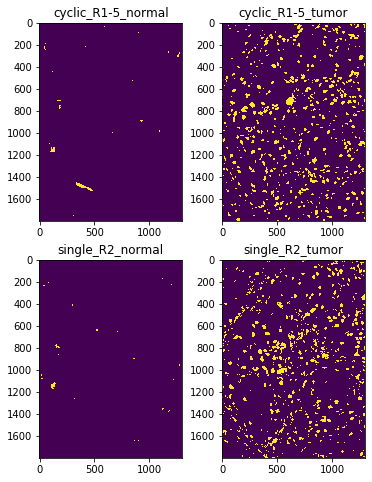

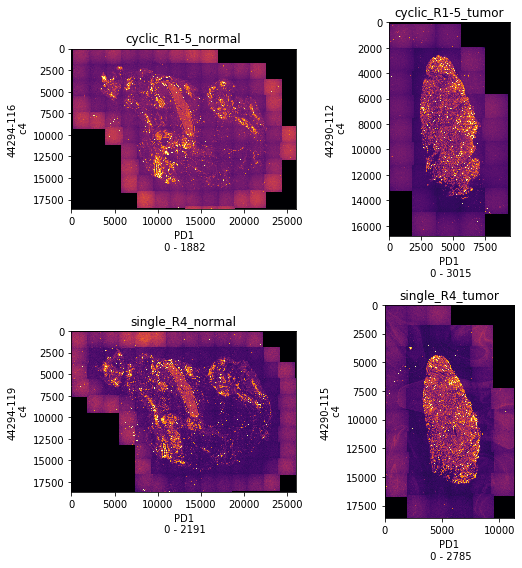

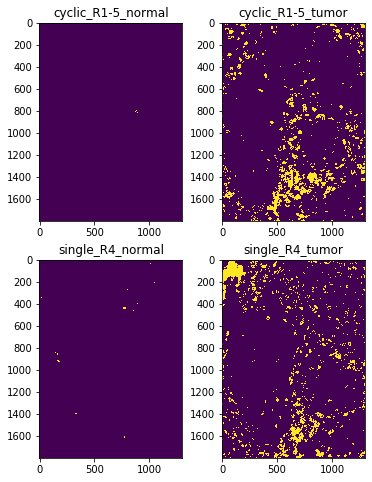

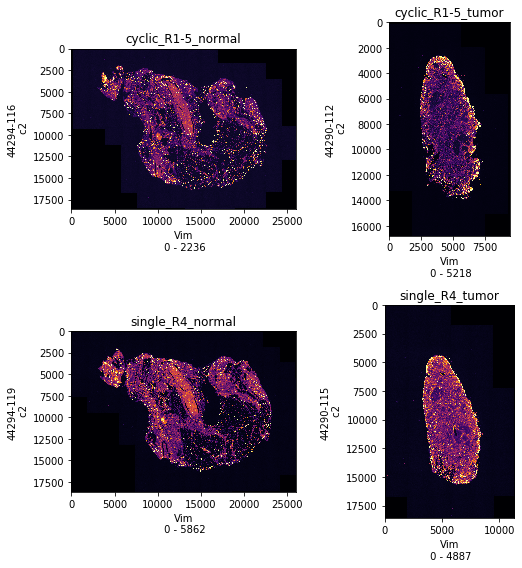

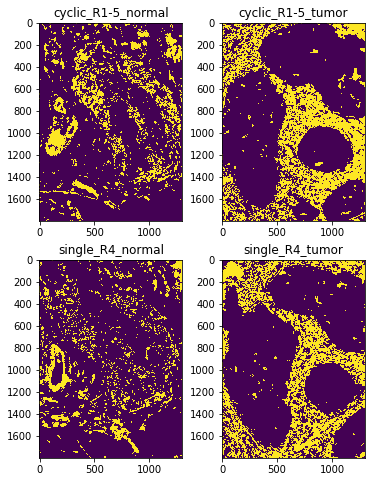

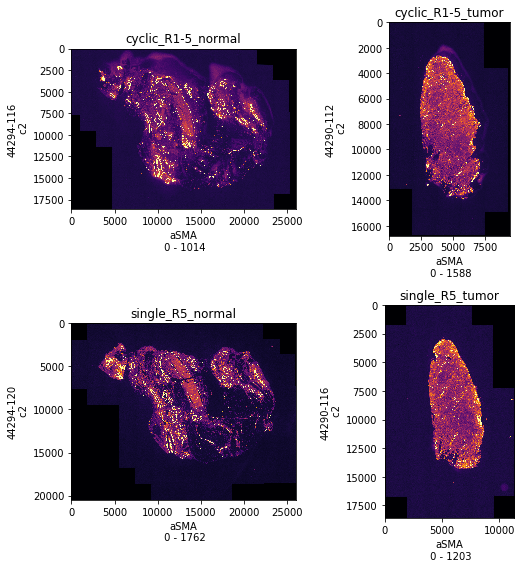

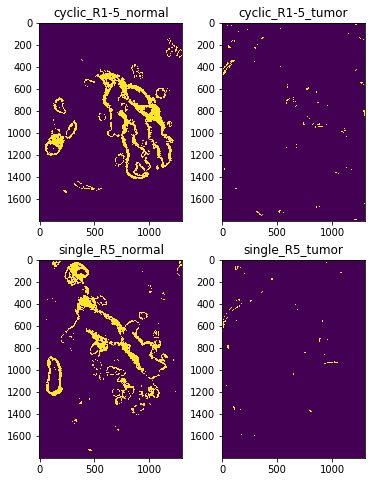

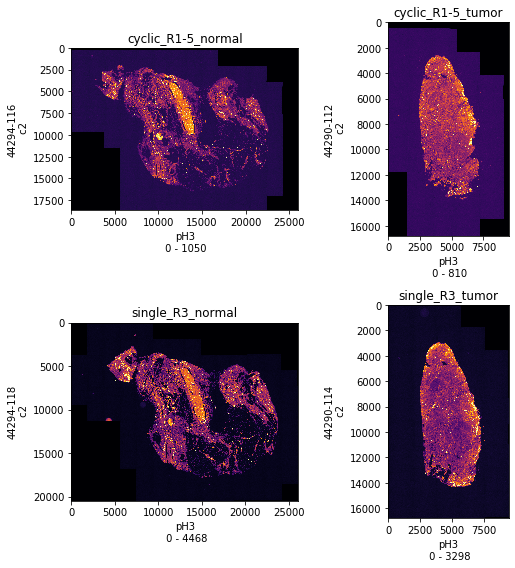

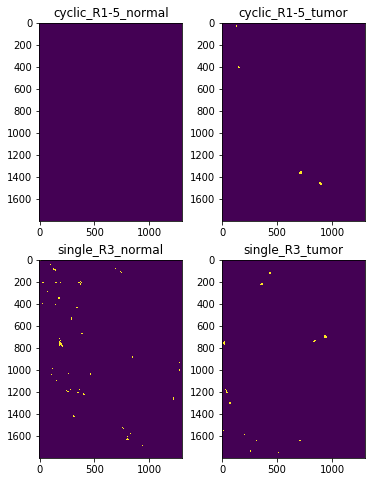

In [4]:
#analyze regions in crop (20191209)
d_crop = {'44290-112':(5000,8800,1300,1800),
 '44290-113':(5886,8111,1300,1800),
 '44290-114':(5010,9242,1300,1800),
 '44290-115':(5975,10490,1300,1800),
 '44290-116':(6336,9174,1300,1800),
 '44294-116':(9547,5459,1300,1800),
 '44294-117':(12180,6092, 1300,1800),
 '44294-118':(10901, 6582, 1300,1800),
 '44294-119':(9853,5557, 1300,1800),
 '44294-120':(10250,5510, 1300,1800),
 }

d_rename = {#'Her2':'HER2', 'pH3':'pHH3', 'LaminAC':'LamAC',
 '(R2)':'R2', '(R3)':'R3', '(R4)':'R4', '(R5)':'R5', '(R6)':'R6'}
df_thresh = pd.read_csv(f'{codedir}/Metadata/44290/metadata_single_vs_cyclic.csv',index_col=0)

df_thresh['slide_marker'] = df_thresh.slide + '_' + df_thresh.marker

d_process = {
    '44290':f'{codedir}/Images/tiff/44290',
 }
for idx,(s_sample, s_path) in enumerate(d_process.items()):
    df_result = pd.DataFrame()
    os.chdir(s_path)
    df_img = mpimage.parse_org()
    df_img = df_img.replace(d_rename)
    df_img['slide_marker'] = df_img.scene + '_' + df_img.marker
    df_img['img_index'] = df_img.index
    df_thresh = df_img.merge(df_thresh, how='inner', on='slide_marker',suffixes=('','_y'))
    df_thresh.index = df_thresh.img_index
    #results
    df_result = pd.DataFrame()
    dd_result = {}
    for s_marker in sorted(set(df_thresh.marker)):
        
        df_marker = df_thresh[(df_thresh.marker==s_marker) & (df_thresh.rounds !='R6')]
        print(f'{s_marker}  {len(df_marker)}')
        #plot the images
        fig = mpimage.array_img(df_marker.sort_values('condition'),s_xlabel='marker',ls_ylabel=['scene','color'],s_title='condition',tu_array=(2,len(df_marker)//2),tu_fig=(8,8),cmap='inferno')
        fig.savefig(f'{codedir}/Figures/{s_sample}/SinglevsCyclic_TissueLoss_Background_{s_marker}.png')
        df_marker_thresh,d_mask = analyze.thresh_meanint(df_marker.sort_values('condition'),d_crop)
        df_result =df_result.append(df_marker_thresh)
        #plot the mask
        fig, ax = plt.subplots(2,len(df_marker)//2,figsize=(6,8))
        ax=ax.ravel()
        for idx,(s_index, a_mask) in enumerate(d_mask.items()):
            ax[idx].imshow(a_mask)
            ax[idx].set_title(df_thresh.loc[s_index,'condition'])
        fig.savefig(f'{codedir}/Figures/{s_sample}/SinglevsCyclic_Thresholding_{s_marker}.png')